In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import re
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel ('full.xlsx')
df.Label.value_counts()

Bukan Kasus    536
Kasus          394
Name: Label, dtype: int64

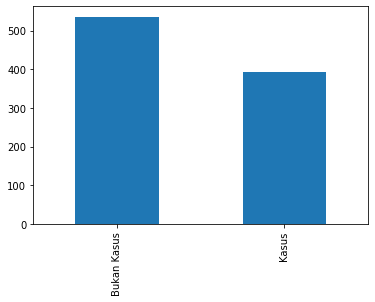

In [4]:
df['Label'].value_counts().plot(kind= 'bar')

In [5]:
def ProTweets(text):
    text = text.lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('http\S+', '', text)
    return text

df['Tweet'] = df['Tweet'].apply(lambda x: ProTweets(x))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df['Tweet'], df['Label'],test_size=0.25, random_state=10)

In [7]:
print("X_train_shape : ",X_train.shape)
print("X_valid_shape : ",X_valid.shape)
print("y_train_shape : ",y_train.shape)
print("y_valid_shape : ",y_valid.shape)

X_train_shape :  (697,)
X_valid_shape :  (233,)
y_train_shape :  (697,)
y_valid_shape :  (233,)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_unigram = CountVectorizer(ngram_range=(1,1))
count_train_unigram = count_unigram.fit_transform(X_train)
count_valid_unigram = count_unigram.transform(X_valid)
print('{} Number of tweets has {} words'.format(count_train_unigram.shape[0], count_train_unigram.shape[1]))
print('{} Number of tweets has {} words'.format(count_valid_unigram.shape[0], count_valid_unigram.shape[1]))

697 Number of tweets has 2109 words
233 Number of tweets has 2109 words


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_bigram = CountVectorizer(ngram_range=(2,2)) 
count_train_bigram = count_bigram.fit_transform(X_train)
count_valid_bigram = count_bigram.transform(X_valid)
print('{} Number of tweets has {} words'.format(count_train_bigram.shape[0], count_train_bigram.shape[1]))
print('{} Number of tweets has {} words'.format(count_valid_bigram.shape[0], count_valid_bigram.shape[1]))

697 Number of tweets has 4653 words
233 Number of tweets has 4653 words


In [10]:
count_df_unigram = pd.DataFrame(count_train_unigram.toarray(), columns=count_unigram.get_feature_names())
count_df_unigram

,01xe2x80xa6,02,021,05,07gatak,0800,0801,0854,091105lbs,091108nns,...,yangxe2x80xa6,yanxe2x80xa6,yayasan,yg,yng,yogya,yogyakarta,yonif,zika,zona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
693,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
count_df_bigram = pd.DataFrame(count_train_bigram.toarray(), columns=count_bigram.get_feature_names())
count_df_bigram

,02 kelurahan,021 51010350,05 banguntapan,07gatak dan,0800 wib,0801 pacitan,0854 beritasonora,091105lbs bekerjasama,091108nns laksanakan,0911nunukan instruksikan,...,yogya capai,yogya hampir,yogya world,yogyakarta melaporkan,yogyakarta mencatat,yogyakarta waspada,yonif 623bwu,zika berikut,zika dengue,zona hijau
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
693,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.naive_bayes import BernoulliNB  # Naive Bayes Classifier
bnb_unigram = BernoulliNB().fit(count_train_unigram, y_train)
bnb_bigram = BernoulliNB().fit(count_train_bigram, y_train)

In [13]:
valid_unigram = bnb_unigram.predict(count_valid_unigram)
valid_bigram = bnb_bigram.predict(count_valid_bigram)

Besar Accuracy:  0.871244635193133


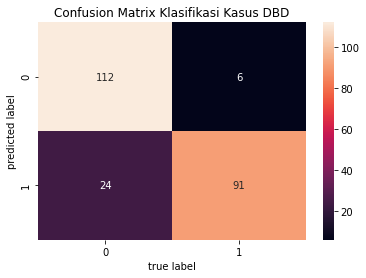

In [14]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

score_bnb = metrics.accuracy_score(valid_unigram, y_valid)
print("Besar Accuracy: ",score_bnb)
sns.heatmap(confusion_matrix(valid_unigram, y_valid), annot=True, fmt=".0f")
plt.title('Confusion Matrix Klasifikasi Kasus DBD')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Besar Accuracy:  0.8798283261802575


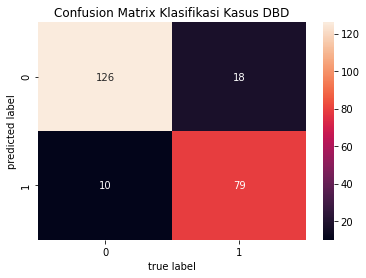

In [15]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

score_bnb = metrics.accuracy_score(valid_bigram, y_valid)
print("Besar Accuracy: ",score_bnb)
sns.heatmap(confusion_matrix(valid_bigram, y_valid), annot=True, fmt=".0f")
plt.title('Confusion Matrix Klasifikasi Kasus DBD')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(valid_unigram, y_valid))
print(classification_report(valid_bigram, y_valid))

              precision    recall  f1-score   support

 Bukan Kasus       0.82      0.95      0.88       118
       Kasus       0.94      0.79      0.86       115

    accuracy                           0.87       233
   macro avg       0.88      0.87      0.87       233
weighted avg       0.88      0.87      0.87       233

              precision    recall  f1-score   support

 Bukan Kasus       0.93      0.88      0.90       144
       Kasus       0.81      0.89      0.85        89

    accuracy                           0.88       233
   macro avg       0.87      0.88      0.87       233
weighted avg       0.88      0.88      0.88       233



In [17]:
dt = pd.read_excel ('data_test.xlsx')
dt.Label.value_counts()

Kasus          126
Bukan Kasus     60
Name: Label, dtype: int64

In [18]:
dt['Tweet'] = dt['Tweet'].apply(lambda x: ProTweets(x))
count_test_unigram = count_unigram.transform(dt['Tweet'])
count_test_bigram = count_bigram.transform(dt['Tweet'])

In [19]:
testing_unigram = bnb_unigram.predict(count_test_unigram)
testing_bigram = bnb_bigram.predict(count_test_bigram)

Accuracy:  0.9354838709677419


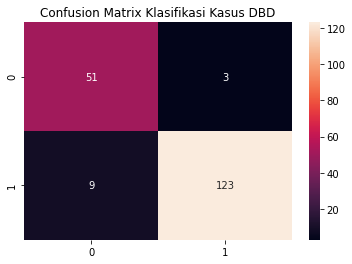

In [20]:
score_bnb = metrics.accuracy_score(testing_unigram, dt['Label'])
print("Accuracy: ",score_bnb)
sns.heatmap(confusion_matrix(testing_unigram, dt['Label']), annot=True, fmt=".0f")
plt.title('Confusion Matrix Klasifikasi Kasus DBD')
plt.show()

Accuracy:  0.9301075268817204


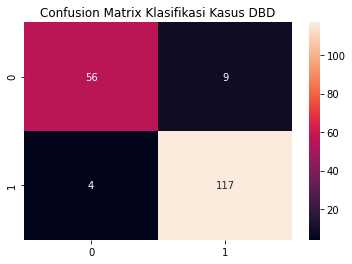

In [21]:
score_bnb = metrics.accuracy_score(testing_bigram, dt['Label'])
print("Accuracy: ",score_bnb)
sns.heatmap(confusion_matrix(testing_bigram, dt['Label']), annot=True, fmt=".0f")
plt.title('Confusion Matrix Klasifikasi Kasus DBD')
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(dt['Label'], testing_unigram))
print(classification_report(dt['Label'], testing_bigram))

              precision    recall  f1-score   support

 Bukan Kasus       0.94      0.85      0.89        60
       Kasus       0.93      0.98      0.95       126

    accuracy                           0.94       186
   macro avg       0.94      0.91      0.92       186
weighted avg       0.94      0.94      0.93       186

              precision    recall  f1-score   support

 Bukan Kasus       0.86      0.93      0.90        60
       Kasus       0.97      0.93      0.95       126

    accuracy                           0.93       186
   macro avg       0.91      0.93      0.92       186
weighted avg       0.93      0.93      0.93       186



In [23]:
import pickle

f = open('model_unigram.pickle', 'wb')
pickle.dump(bnb_unigram, f)
f.close()

In [24]:
import pickle

f = open('model_bigramm.pickle', 'wb')
pickle.dump(bnb_bigram, f)
f.close()

In [25]:
import pickle

f = open('model_unigram.pickle', 'rb')
classifier = pickle.load(f)
f.close()

In [41]:
test_text = pd.read_excel('data_test.xlsx')
test_text['Tweet'] = test_text['Tweet'].apply(lambda x: ProTweets(x))
test_text = count_unigram.transform(test_text['Tweet'])

In [42]:
test = classifier.predict(test_text)

In [43]:
test

array(['Kasus', 'Bukan Kasus', 'Bukan Kasus', 'Bukan Kasus',
       'Bukan Kasus', 'Bukan Kasus', 'Bukan Kasus', 'Bukan Kasus',
       'Bukan Kasus', 'Bukan Kasus', 'Bukan Kasus', 'Bukan Kasus',
       'Bukan Kasus', 'Bukan Kasus', 'Bukan Kasus', 'Kasus',
       'Bukan Kasus', 'Bukan Kasus', 'Bukan Kasus', 'Bukan Kasus',
       'Bukan Kasus', 'Bukan Kasus', 'Bukan Kasus', 'Bukan Kasus',
       'Bukan Kasus', 'Kasus', 'Bukan Kasus', 'Bukan Kasus', 'Kasus',
       'Kasus', 'Kasus', 'Bukan Kasus', 'Bukan Kasus', 'Kasus', 'Kasus',
       'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus',
       'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus',
       'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus',
       'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus',
       'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Bukan Kasus', 'Kasus',
       'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus',
       'Kasus', 'Kasus', 'Kasus', 'Kasus', 'Kasus'

In [44]:
def predict(text,bnb_unigram,count_unigram,ProTweets):
    text = ProTweets(text)
    vect_text = count_unigram.transform([text])
    out = bnb_unigram.predict(vect_text)
    if out == 'Kasus' :
        return 'Kasus'
    else :
        return 'Bukan Kasus'

In [45]:
test_text = 'kasus dbd meningkat di jakarta'
predict(test_text,bnb_unigram,count_unigram,ProTweets)

'Kasus'